# 1. Robust summaries and log transformation

####  일시 : 2015년 7월 21일 화요일
####  발표자 : 최 창 순

## 1) Introduction

---

- ** The normal apporximatiion is often useful when analyzing life sciences data. However, due to the complexity of the measurement devices it is also common to mistakenlyobserve data points generated by an undesired process. For example, a defect on a scanner can produce a hanful of very high intensities. Thus we may have situationst that are approximated by a, for example, 99 data points from a standard normal distribution and one very large number.**

---

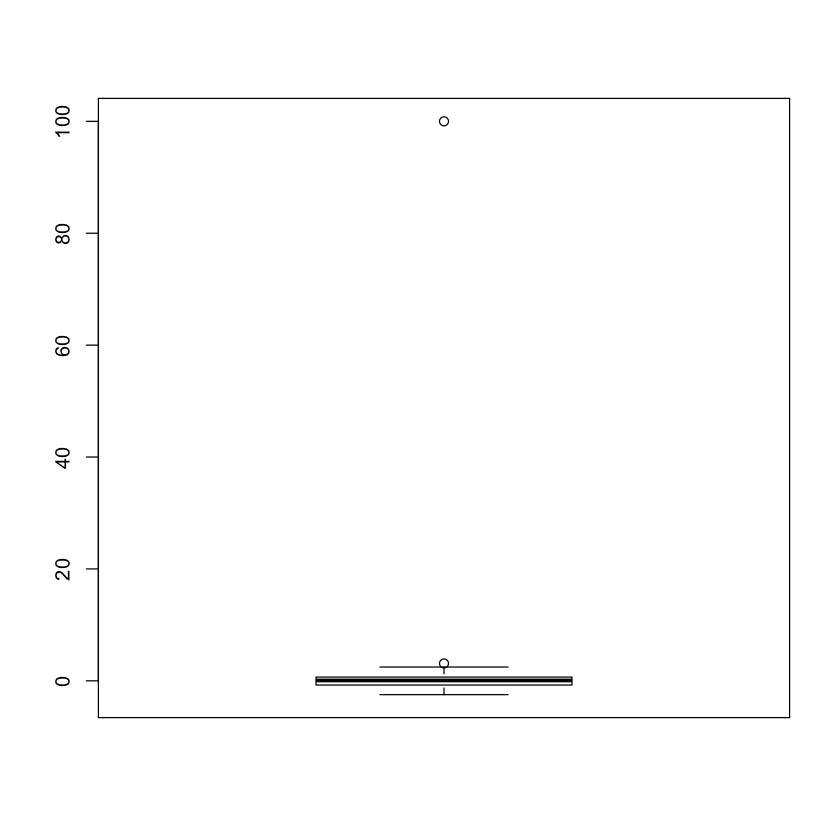

In [1]:
x = c(rnorm(100,0,1)) ## real distribution
x[23] <- 100 ## mistake made in 23th measurement
boxplot(x)

In [6]:
length(x)

[1] 100


- ** In statistics we refer these types of points as outliers. A small number of outliers can throw of an entire analysis. For example notice how this one point results in the sample mean and sample variace being very far from the 0 and 1 respectively.**



In [8]:
mean(x)
sd(x)

[1] 0.9507472

[1] 10.06373

## 2) The Median

---
- ** The median, defined as the point having half the data larger and half the data smaller, is a summary statistic that is robust to outliers. Note how much closer the median is to 0, the center of our actual distribution.** 

---

In [9]:
median(x)

[1] 0.06768891

## 3) The Median Absolute Deviance

---

- ** The median absolute deviace (MAD) is a robust summary for the standard deviation. It is defined by computing the differences between each point and the median and taking the median of their absolute values: **

> ** 1.4826 * median{|Xi−median(Xi)|}**

- ** The number 1.4826 is a scale factor that guarantees an unbiased estimate of the actual center. Notice how much closer we are to one with the mad: **

---

In [10]:
mad(x)

[1] 1.065826

## 4) Spearman correlation

---

- ** Earlier we saw that the correlation is also sensitive to outliers. Here we construct a independent list of numbers but for which a simialr mistake was made for the same entry:**

---



In [15]:
# library(devtools)
# install_github('rafalib','ririzarr')
# library(rafalib)

Warning message:
: Username parameter is deprecated. Please use ririzarr/rafalibDownloading github repo ririzarr/rafalib@master
Installing rafalib
'/Library/Frameworks/R.framework/Resources/bin/R' --no-site-file --no-environ  \
  --no-save --no-restore CMD INSTALL  \
  '/private/var/folders/6b/vzq39bws05z1rvsdztchrth80000gn/T/RtmpffiZj8/devtools2ead29987e98/ririzarr-rafalib-c52c1df'  \
  --library='/Library/Frameworks/R.framework/Versions/3.2/Resources/library'  \
  --install-tests 

Loading required package: RColorBrewer


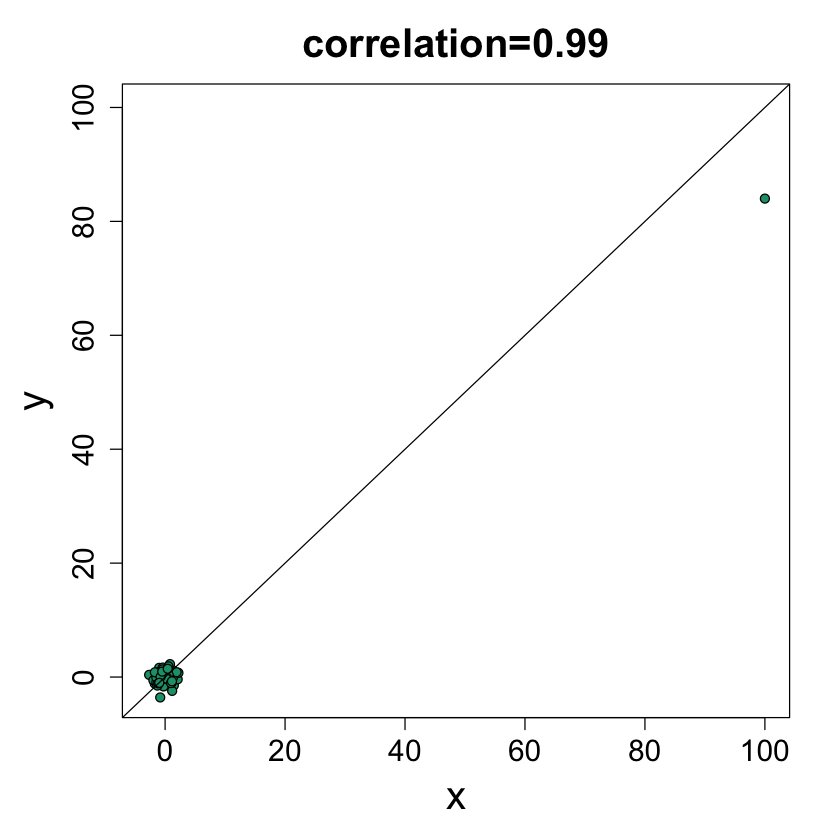

In [16]:
x=c(rnorm(100,0,1)) ## real distribution
x[23] <- 100 ## mistake made in 23th measurement
y=c(rnorm(100,0,1)) ## real distribution
y[23] <- 84 ## similar mistake made in 23th measurement

library("rafalib")
mypar(1,1)
plot(x,y,main=paste0("correlation=",round(cor(x,y),3)),pch=21,bg=1,xlim=c(-3,100),ylim=c(-3,100))
abline(0,1)

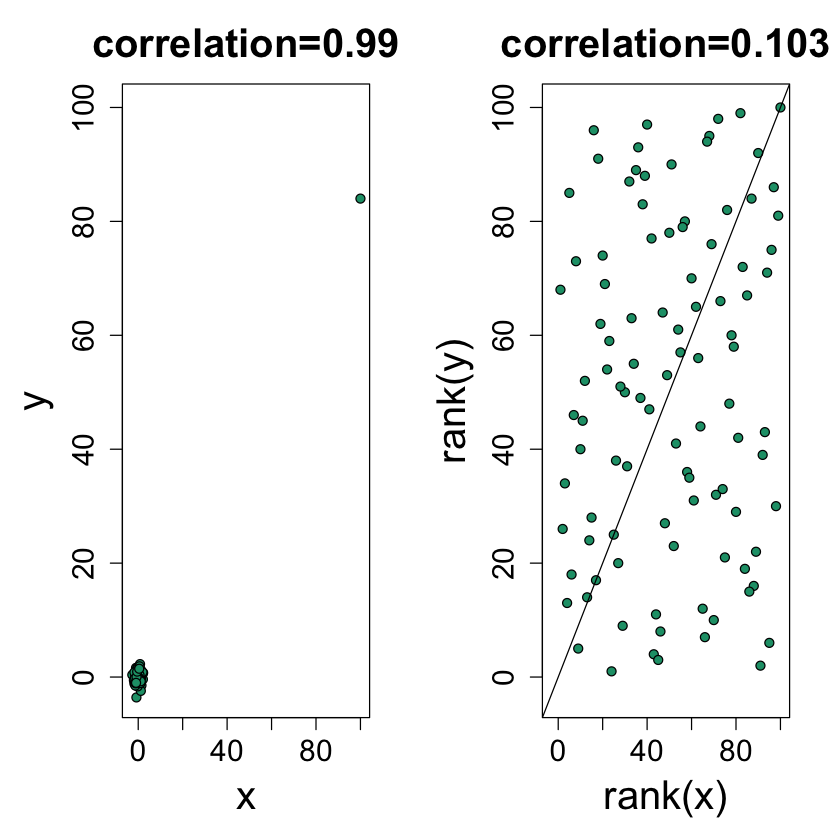

In [17]:
mypar(1,2)
plot(x,y,main=paste0("correlation=",round(cor(x,y),3)),pch=21,bg=1,xlim=c(-3,100),ylim=c(-3,100))
plot(rank(x),rank(y),main=paste0("correlation=",round(cor(x,y,method="spearman"),3)),pch=21,bg=1,xlim=c(-3,100),ylim=c(-3,100))
abline(0,1)

## 5) Symmetry of log ratios \ Ratios are not symmetric

---

- ** Reporting ratios or fold changes are common in the life science. Suppose you are studying ratio data showing, say, gene expression before and after treatment. You are given ratio data so values larger than 1 mean gene expression was higher after the treatment. If the treatment has no effect we should see as many value below 1 as above 1. A histogram seems to suggest that the treatment does in fact have an effect:**

---

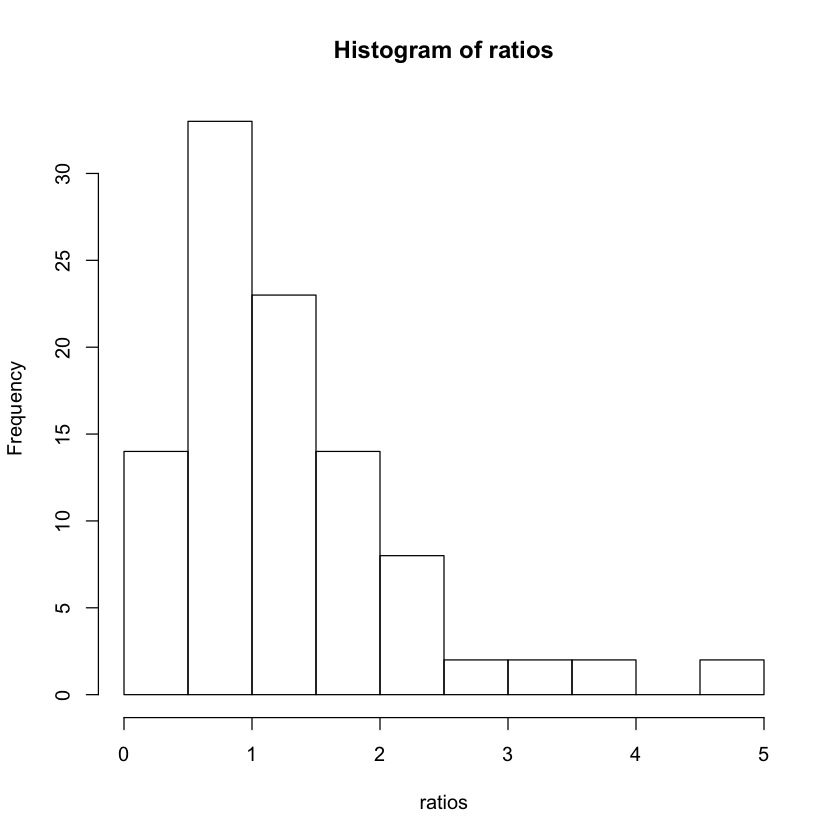

In [19]:
ratios <- 2^(rnorm(100))
hist(ratios)

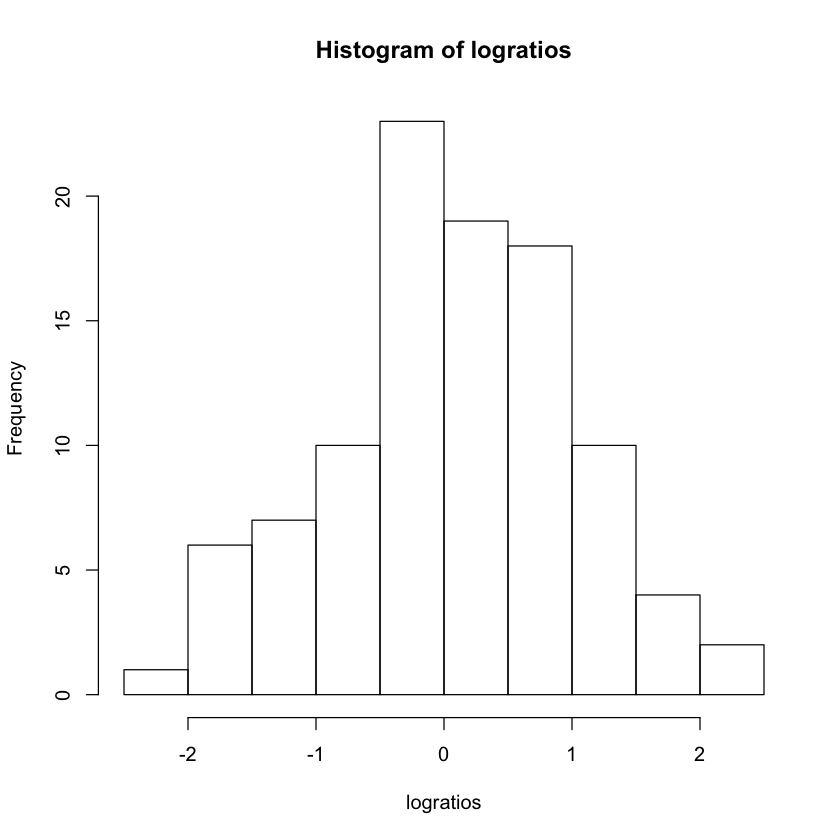

In [20]:
logratios <- log2(ratios)
hist(logratios)

- ** The log of ratios are of course symmetric around 0 because**

> ** log(x/y) = log(x) − log(y) = −(log(y) − log(x)) = log(y/x)**

- ** As demonstrated by these simple plots:**

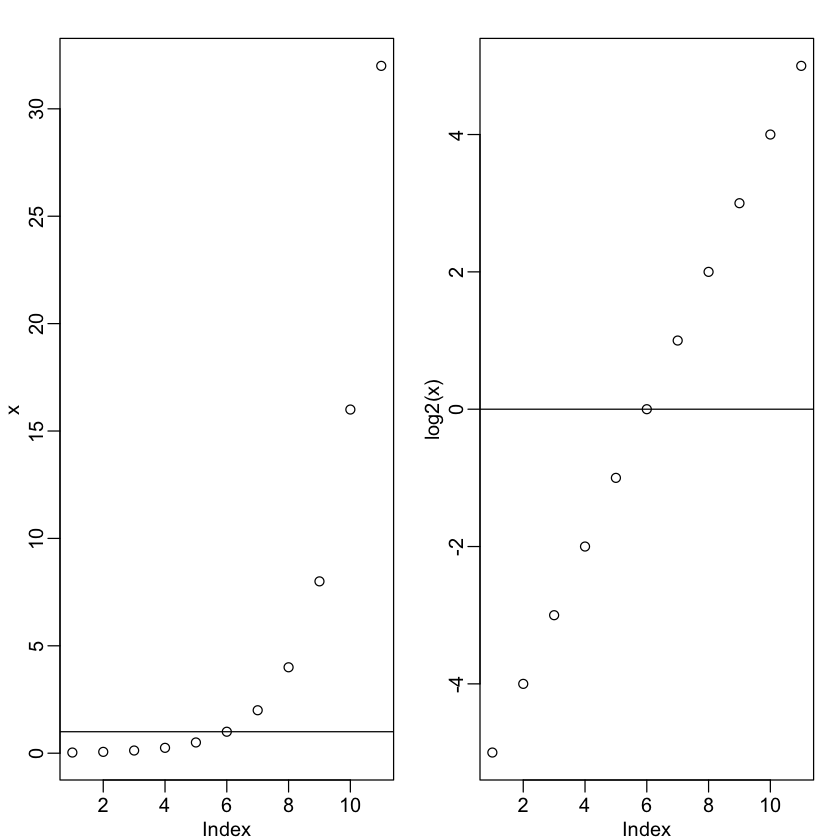

In [21]:
x <- 2^(-5:5) ##this 1/32,1/16,1/8,...,1,2,...,32
mypar2(1,2)
plot(x)
abline(h=1)
plot(log2(x))
abline(h=0)

- ** The log transformation is also commonly used because fold changes are the most widely used quantification of interest. Note that a fold change of 100 can be a ratio of 100/1 or 1/100. However, 1/100 is much closer to 1 (no fold change) than 100: ratios are not symmetric about 1.**

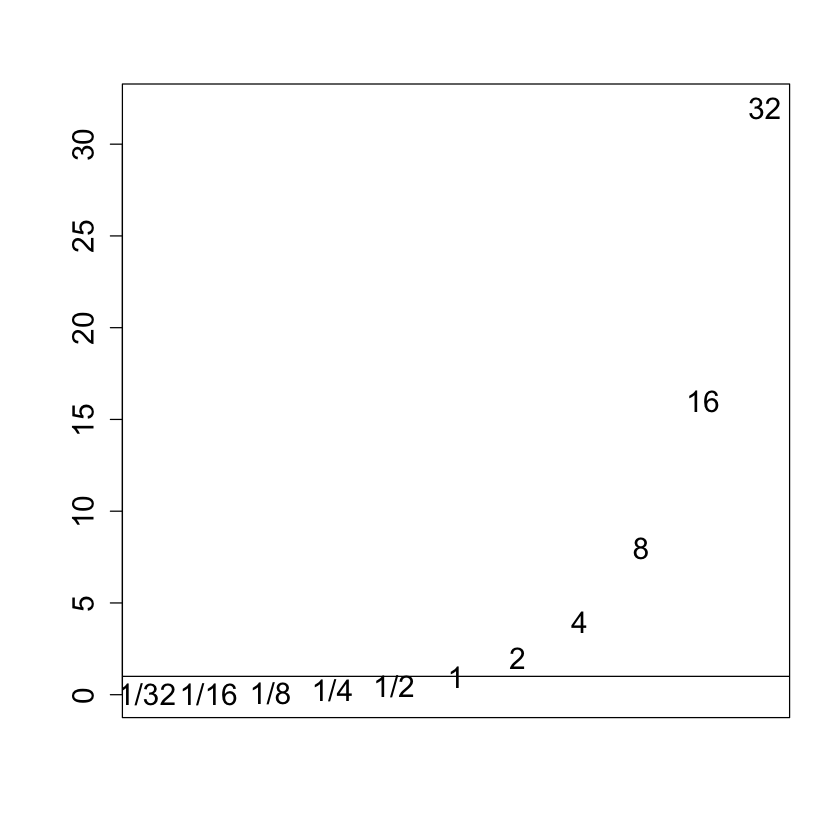

In [22]:
x=2^seq(1,5)
y=c(rev(1/x),1,x)
Names=c(paste0("1/",rev(x)),1,x)
mypar(1,1)
plot(seq(along=y),y,xlab="",ylab="",type="n",xaxt="n")
text(seq(along=y),y,Names,cex=1.5)
abline(h=1)

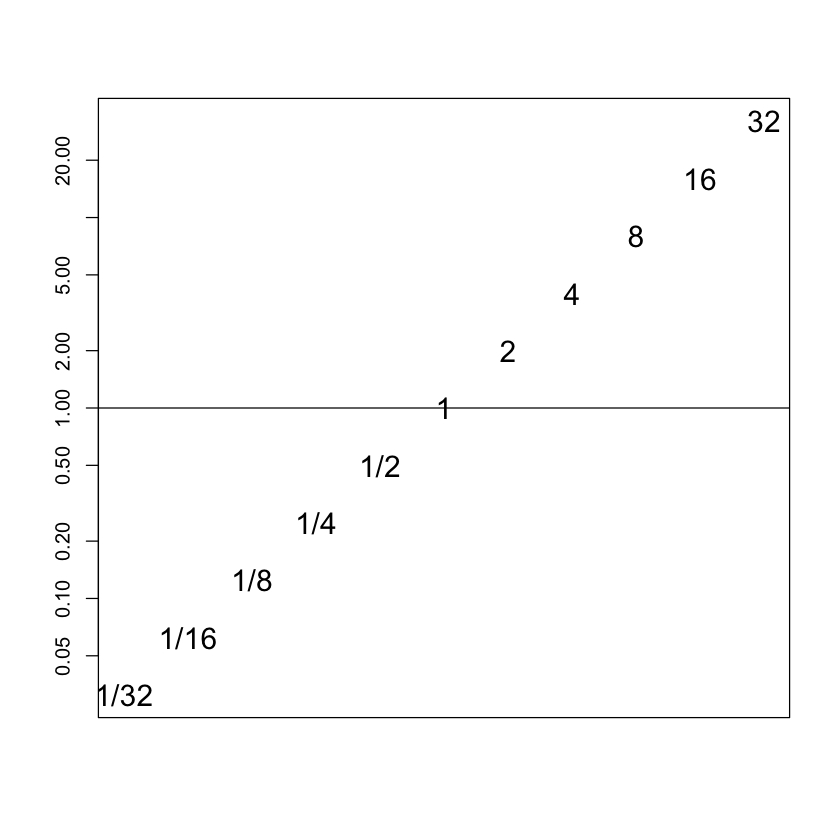

In [23]:
plot(seq(along=y),y,xlab="",ylab="",type="n",log="y",xaxt="n")
text(seq(along=y),y,Names,cex=1.5)
abline(h=1)

# 2. Introducing dplyr

In [62]:
install.packages("downloader")


The downloaded binary packages are in
	/var/folders/6b/vzq39bws05z1rvsdztchrth80000gn/T//RtmpffiZj8/downloaded_packages


In [64]:
library(downloader)
url <- "https://raw.githubusercontent.com/genomicsclass/dagdata/master/inst/extdata/msleep_ggplot2.csv"
filename <- "msleep_ggplot2.csv"
if (!file.exists(filename)) download(url,filename)
msleep <- read.csv("msleep_ggplot2.csv")
head(msleep)
dim(msleep)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50
2,Owl monkey,Aotus,omni,Primates,NA,17,1.8,NA,7,0.0155,0.48
3,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.35
4,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
5,Cow,Bos,herbi,Artiodactyla,domesticated,4,0.7,0.6666667,20,0.423,600
6,Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.85


[1] 83 11

In [24]:
# install.packages("dplyr")
library(dplyr)


The downloaded binary packages are in
	/var/folders/6b/vzq39bws05z1rvsdztchrth80000gn/T//RtmpffiZj8/downloaded_packages


## 1) Filter rows with filter()



- filter() allows you to select a subset of the rows of a data frame. The first argument is the name of the data frame, and the second and subsequent are filtering expressions evaluated in the context of that data frame:


In [90]:
filter(msleep, sleep_total >= 16)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NA,17,1.8,NA,7,0.0155,0.48
2,Long-nosed armadillo,Dasypus,carni,Cingulata,lc,17.4,3.1,0.3833333,6.6,0.0108,3.5
3,North American Opossum,Didelphis,omni,Didelphimorphia,lc,18,4.9,0.3333333,6,0.0063,1.7
4,Big brown bat,Eptesicus,insecti,Chiroptera,lc,19.7,3.9,0.1166667,4.3,3e-04,0.023
5,Thick-tailed opposum,Lutreolina,carni,Didelphimorphia,lc,19.4,6.6,NA,4.6,NA,0.37
6,Little brown bat,Myotis,insecti,Chiroptera,NA,19.9,2,0.2,4.1,0.00025,0.01
7,Giant armadillo,Priodontes,insecti,Cingulata,en,18.1,6.1,NA,5.9,0.081,60
8,Arctic ground squirrel,Spermophilus,herbi,Rodentia,lc,16.6,NA,NA,7.4,0.0057,0.92


In [91]:
subset(msleep, sleep_total >= 16)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
2,Owl monkey,Aotus,omni,Primates,NA,17,1.8,NA,7,0.0155,0.48
18,Long-nosed armadillo,Dasypus,carni,Cingulata,lc,17.4,3.1,0.3833333,6.6,0.0108,3.5
20,North American Opossum,Didelphis,omni,Didelphimorphia,lc,18,4.9,0.3333333,6,0.0063,1.7
22,Big brown bat,Eptesicus,insecti,Chiroptera,lc,19.7,3.9,0.1166667,4.3,3e-04,0.023
37,Thick-tailed opposum,Lutreolina,carni,Didelphimorphia,lc,19.4,6.6,NA,4.6,NA,0.37
43,Little brown bat,Myotis,insecti,Chiroptera,NA,19.9,2,0.2,4.1,0.00025,0.01
62,Giant armadillo,Priodontes,insecti,Cingulata,en,18.1,6.1,NA,5.9,0.081,60
70,Arctic ground squirrel,Spermophilus,herbi,Rodentia,lc,16.6,NA,NA,7.4,0.0057,0.92


In [35]:
slice(flights, 1:10) ; fligthts[1:10, ]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
1,2013,1,1,517,2,830,11,UA,N14228,1545,EWR,IAH,227,1400,5,17
2,2013,1,1,533,4,850,20,UA,N24211,1714,LGA,IAH,227,1416,5,33
3,2013,1,1,542,2,923,33,AA,N619AA,1141,JFK,MIA,160,1089,5,42
4,2013,1,1,544,-1,1004,-18,B6,N804JB,725,JFK,BQN,183,1576,5,44
5,2013,1,1,554,-6,812,-25,DL,N668DN,461,LGA,ATL,116,762,5,54
6,2013,1,1,554,-4,740,12,UA,N39463,1696,EWR,ORD,150,719,5,54
7,2013,1,1,555,-5,913,19,B6,N516JB,507,EWR,FLL,158,1065,5,55
8,2013,1,1,557,-3,709,-14,EV,N829AS,5708,LGA,IAD,53,229,5,57
9,2013,1,1,557,-3,838,-8,B6,N593JB,79,JFK,MCO,140,944,5,57
10,2013,1,1,558,-2,753,8,AA,N3ALAA,301,LGA,ORD,138,733,5,58


In [92]:
filter(msleep, sleep_total >= 16, bodywt >= 1)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Long-nosed armadillo,Dasypus,carni,Cingulata,lc,17.4,3.1,0.3833333,6.6,0.0108,3.5
2,North American Opossum,Didelphis,omni,Didelphimorphia,lc,18,4.9,0.3333333,6,0.0063,1.7
3,Giant armadillo,Priodontes,insecti,Cingulata,en,18.1,6.1,NA,5.9,0.081,60


In [93]:
subset(msleep, sleep_total >= 16 & bodywt >= 1)

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
18,Long-nosed armadillo,Dasypus,carni,Cingulata,lc,17.4,3.1,0.3833333,6.6,0.0108,3.5
20,North American Opossum,Didelphis,omni,Didelphimorphia,lc,18,4.9,0.3333333,6,0.0063,1.7
62,Giant armadillo,Priodontes,insecti,Cingulata,en,18.1,6.1,NA,5.9,0.081,60


In [95]:
filter(msleep, order %in% c("Perissodactyla", "Primates"))

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Owl monkey,Aotus,omni,Primates,NA,17,1.8,NA,7,0.0155,0.48
2,Grivet,Cercopithecus,omni,Primates,lc,10,0.7,NA,14,NA,4.75
3,Horse,Equus,herbi,Perissodactyla,domesticated,2.9,0.6,1,21.1,0.655,521
4,Donkey,Equus,herbi,Perissodactyla,domesticated,3.1,0.4,NA,20.9,0.419,187
5,Patas monkey,Erythrocebus,omni,Primates,lc,10.9,1.1,NA,13.1,0.115,10
6,Galago,Galago,omni,Primates,NA,9.8,1.1,0.55,14.2,0.005,0.2
7,Human,Homo,omni,Primates,NA,8,1.9,1.5,16,1.32,62
8,Mongoose lemur,Lemur,herbi,Primates,vu,9.5,0.9,NA,14.5,NA,1.67
9,Macaque,Macaca,omni,Primates,NA,10.1,1.2,0.75,13.9,0.179,6.8
10,Slow loris,Nyctibeus,carni,Primates,NA,11,NA,NA,13,0.0125,1.4


## 2) Selecting columns using select()



In [65]:
sleepData <- select(msleep, name, sleep_total)
head(sleepData)

,name,sleep_total
1,Cheetah,12.1
2,Owl monkey,17
3,Mountain beaver,14.4
4,Greater short-tailed shrew,14.9
5,Cow,4
6,Three-toed sloth,14.4


In [67]:
msleep[,c("name", "sleep_total")]

,name,sleep_total
1,Cheetah,12.1
2,Owl monkey,17
3,Mountain beaver,14.4
4,Greater short-tailed shrew,14.9
5,Cow,4
6,Three-toed sloth,14.4
7,Northern fur seal,8.7
8,Vesper mouse,7
9,Dog,10.1
10,Roe deer,3


In [68]:
head(select(msleep, -name))

,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50
2,Aotus,omni,Primates,NA,17,1.8,NA,7,0.0155,0.48
3,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.35
4,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
5,Bos,herbi,Artiodactyla,domesticated,4,0.7,0.6666667,20,0.423,600
6,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.85


In [81]:
msleep[,!colnames(msleep) == "name"]

,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50
2,Aotus,omni,Primates,NA,17,1.8,NA,7,0.0155,0.48
3,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.35
4,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019
5,Bos,herbi,Artiodactyla,domesticated,4,0.7,0.6666667,20,0.423,600
6,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.85
7,Callorhinus,carni,Carnivora,vu,8.7,1.4,0.3833333,15.3,NA,20.49
8,Calomys,NA,Rodentia,NA,7,NA,NA,17,NA,0.045
9,Canis,carni,Carnivora,domesticated,10.1,2.9,0.3333333,13.9,0.07,14
10,Capreolus,herbi,Artiodactyla,lc,3,NA,NA,21,0.0982,14.8


In [82]:
head(select(msleep, name:order))

,name,genus,vore,order
1,Cheetah,Acinonyx,carni,Carnivora
2,Owl monkey,Aotus,omni,Primates
3,Mountain beaver,Aplodontia,herbi,Rodentia
4,Greater short-tailed shrew,Blarina,omni,Soricomorpha
5,Cow,Bos,herbi,Artiodactyla
6,Three-toed sloth,Bradypus,herbi,Pilosa


## 3) Pipe operator: %>%


In [96]:
head(select(msleep, name, sleep_total))

,name,sleep_total
1,Cheetah,12.1
2,Owl monkey,17
3,Mountain beaver,14.4
4,Greater short-tailed shrew,14.9
5,Cow,4
6,Three-toed sloth,14.4


In [97]:
msleep %>% 
    select(name, sleep_total) %>% 
    head

,name,sleep_total
1,Cheetah,12.1
2,Owl monkey,17
3,Mountain beaver,14.4
4,Greater short-tailed shrew,14.9
5,Cow,4
6,Three-toed sloth,14.4


## 4) Back to dplyr verbs in action


### Arrange or re-order rows using arrange()



In [98]:
msleep %>% arrange(order) %>% head

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt
1,Tenrec,Tenrec,omni,Afrosoricida,NA,15.6,2.3,NA,8.4,0.0026,0.9
2,Cow,Bos,herbi,Artiodactyla,domesticated,4,0.7,0.6666667,20,0.423,600
3,Roe deer,Capreolus,herbi,Artiodactyla,lc,3,NA,NA,21,0.0982,14.8
4,Goat,Capri,herbi,Artiodactyla,lc,5.3,0.6,NA,18.7,0.115,33.5
5,Giraffe,Giraffa,herbi,Artiodactyla,cd,1.9,0.4,NA,22.1,NA,899.995
6,Sheep,Ovis,herbi,Artiodactyla,domesticated,3.8,0.6,NA,20.2,0.175,55.5


In [99]:
msleep %>% 
    select(name, order, sleep_total) %>%
    arrange(order, sleep_total) %>% 
    head

,name,order,sleep_total
1,Tenrec,Afrosoricida,15.6
2,Giraffe,Artiodactyla,1.9
3,Roe deer,Artiodactyla,3
4,Sheep,Artiodactyla,3.8
5,Cow,Artiodactyla,4
6,Goat,Artiodactyla,5.3


In [100]:
msleep %>% 
    select(name, order, sleep_total) %>%
    arrange(order, sleep_total) %>% 
    filter(sleep_total >= 16)

,name,order,sleep_total
1,Big brown bat,Chiroptera,19.7
2,Little brown bat,Chiroptera,19.9
3,Long-nosed armadillo,Cingulata,17.4
4,Giant armadillo,Cingulata,18.1
5,North American Opossum,Didelphimorphia,18
6,Thick-tailed opposum,Didelphimorphia,19.4
7,Owl monkey,Primates,17
8,Arctic ground squirrel,Rodentia,16.6


In [101]:
msleep %>% 
    select(name, order, sleep_total) %>%
    arrange(order, desc(sleep_total)) %>% 
    filter(sleep_total >= 16)

,name,order,sleep_total
1,Little brown bat,Chiroptera,19.9
2,Big brown bat,Chiroptera,19.7
3,Giant armadillo,Cingulata,18.1
4,Long-nosed armadillo,Cingulata,17.4
5,Thick-tailed opposum,Didelphimorphia,19.4
6,North American Opossum,Didelphimorphia,18
7,Owl monkey,Primates,17
8,Arctic ground squirrel,Rodentia,16.6


### Create new columns using mutate()



In [102]:
msleep %>% 
    mutate(rem_proportion = sleep_rem / sleep_total) %>%
    head

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt,rem_proportion
1,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50,NA
2,Owl monkey,Aotus,omni,Primates,NA,17,1.8,NA,7,0.0155,0.48,0.1058824
3,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.35,0.1666667
4,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019,0.1543624
5,Cow,Bos,herbi,Artiodactyla,domesticated,4,0.7,0.6666667,20,0.423,600,0.175
6,Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.85,0.1527778


In [103]:
msleep %>% 
    mutate(rem_proportion = sleep_rem / sleep_total, 
           bodywt_grams = bodywt * 1000) %>%
    head

,name,genus,vore,order,conservation,sleep_total,sleep_rem,sleep_cycle,awake,brainwt,bodywt,rem_proportion,bodywt_grams
1,Cheetah,Acinonyx,carni,Carnivora,lc,12.1,NA,NA,11.9,NA,50,NA,50000
2,Owl monkey,Aotus,omni,Primates,NA,17,1.8,NA,7,0.0155,0.48,0.1058824,480
3,Mountain beaver,Aplodontia,herbi,Rodentia,nt,14.4,2.4,NA,9.6,NA,1.35,0.1666667,1350
4,Greater short-tailed shrew,Blarina,omni,Soricomorpha,lc,14.9,2.3,0.1333333,9.1,0.00029,0.019,0.1543624,19
5,Cow,Bos,herbi,Artiodactyla,domesticated,4,0.7,0.6666667,20,0.423,600,0.175,6e+05
6,Three-toed sloth,Bradypus,herbi,Pilosa,NA,14.4,2.2,0.7666667,9.6,NA,3.85,0.1527778,3850


### Create summaries of the data frame using summarise()



In [104]:
msleep %>% 
    summarise(avg_sleep = mean(sleep_total))

,avg_sleep
1,10.43373


In [105]:
msleep %>% 
    summarise(avg_sleep = mean(sleep_total), 
              min_sleep = min(sleep_total),
              max_sleep = max(sleep_total),
              total = n())

,avg_sleep,min_sleep,max_sleep,total
1,10.43373,1.9,19.9,83


### Group operations using group_by()



In [8]:
msleep %>% 
    group_by(order) %>%
    summarise(avg_sleep = mean(sleep_total), 
              min_sleep = min(sleep_total), 
              max_sleep = max(sleep_total),
              total = n()) 

,order,avg_sleep,min_sleep,max_sleep,total
1,Afrosoricida,15.6,15.6,15.6,1
2,Artiodactyla,4.516667,1.9,9.1,6
3,Carnivora,10.11667,3.5,15.8,12
4,Cetacea,4.5,2.7,5.6,3
5,Chiroptera,19.8,19.7,19.9,2
6,Cingulata,17.75,17.4,18.1,2
7,Didelphimorphia,18.7,18,19.4,2
8,Diprotodontia,12.4,11.1,13.7,2
9,Erinaceomorpha,10.2,10.1,10.3,2
10,Hyracoidea,5.666667,5.3,6.3,3
